In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import split_multiple_choice as ult

sns.set(style='darkgrid')

%matplotlib inline


Read the survey data from 2017 to 2022

In [2]:
df_2022 = pd.read_csv('data/survey_results_public_2022.csv')
df_2021 = pd.read_csv('data/survey_results_public_2021.csv')
df_2020 = pd.read_csv('data/survey_results_public_2020.csv')
df_2019 = pd.read_csv('data/survey_results_public_2019.csv')
df_2018 = pd.read_csv('data/survey_results_public_2018.csv')
df_2017 = pd.read_csv('data/survey_results_public_2017.csv')


C:\Users\giahu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Create consolidate dataframe

In [3]:
df_database_current = pd.DataFrame()

df_database_current = ult.create_dataframe(
    df_database_current, df_2017.HaveWorkedDatabase, 2017)
df_database_current = ult.create_dataframe(
    df_database_current, df_2018.DatabaseWorkedWith, 2018)
df_database_current = ult.create_dataframe(
    df_database_current, df_2019.DatabaseWorkedWith, 2019)
df_database_current = ult.create_dataframe(
    df_database_current, df_2020.DatabaseWorkedWith, 2020)
df_database_current = ult.create_dataframe(
    df_database_current, df_2021.DatabaseHaveWorkedWith, 2021)
df_database_current = ult.create_dataframe(
    df_database_current, df_2022.DatabaseHaveWorkedWith, 2022)

df_database_desire = pd.DataFrame()
df_database_desire = ult.create_dataframe(
    df_database_desire, df_2017.WantWorkDatabase, 2017)
df_database_desire = ult.create_dataframe(
    df_database_desire, df_2018.DatabaseDesireNextYear, 2018)
df_database_desire = ult.create_dataframe(
    df_database_desire, df_2019.DatabaseDesireNextYear, 2019)
df_database_desire = ult.create_dataframe(
    df_database_desire, df_2020.DatabaseDesireNextYear, 2020)
df_database_desire = ult.create_dataframe(
    df_database_desire, df_2021.DatabaseWantToWorkWith, 2021)
df_database_desire = ult.create_dataframe(
    df_database_desire, df_2022.DatabaseWantToWorkWith, 2022)


In [11]:
df_database_current

,2017,2018,2019,2020,2021,2022
MYSQL,16375.0,38909.0,40537.0,27559.0,35289.0,28520.0
SQL SERVER,11358.0,27293.0,NaN,NaN,NaN,NaN
SQLITE,7838.0,13036.0,23713.0,15434.0,22634.0,19487.0
POSTGRESQL,7815.0,21776.0,25758.0,17892.0,28424.0,26538.0
MONGODB,6192.0,17183.0,19100.0,13086.0,19479.0,17228.0
ORACLE,4874.0,7376.0,12353.0,8155.0,8868.0,6994.0
REDIS,4143.0,11944.0,13971.0,9056.0,14552.0,13471.0
CASSANDRA,906.0,2444.0,2597.0,1654.0,1873.0,1617.0
ELASTICSEARCH,NaN,9312.0,10720.0,6817.0,9331.0,7430.0
MARIADB,NaN,8853.0,12401.0,8312.0,12088.0,10912.0


### Clean up the data
We need to normalize the name of some database 
- 'SQL SERVER' and 'MICROSOFT SQL SERVER'
- 'FIREBASE' and 'FIREBASE REALTIME DATABASE'
- 'DYNAMODB' and 'AMAZON DYNAMODB'

In [29]:
df_database_current.loc['SQL SERVER'] = df_database_current.loc[['SQL SERVER', 'MICROSOFT SQL SERVER']].sum()
df_database_desire.loc['SQL SERVER'] = df_database_desire.loc[['SQL SERVER', 'MICROSOFT SQL SERVER']].sum()

df_database_current.loc['FIREBASE'] = df_database_current.loc[['FIREBASE', 'FIREBASE REALTIME DATABASE']].sum()
df_database_desire.loc['FIREBASE'] = df_database_desire.loc[['FIREBASE', 'FIREBASE REALTIME DATABASE']].sum()

df_database_current.loc['DYNAMODB'] = df_database_current.loc[['DYNAMODB', 'AMAZON DYNAMODB']].sum()
df_database_desire.loc['DYNAMODB'] = df_database_desire.loc[['DYNAMODB', 'AMAZON DYNAMODB']].sum()

need_drop_database = ['MICROSOFT SQL SERVER', 'FIREBASE REALTIME DATABASE', 'AMAZON DYNAMODB']

df_database_current.drop(labels=need_drop_database, inplace=True)
df_database_desire.drop(labels=need_drop_database, inplace=True)

In [31]:
df_database_desire

,2017,2018,2019,2020,2021,2022
MYSQL,9877.0,21965.0,25750.0,15734.0,20307.0,16271.0
MONGODB,9823.0,20926.0,23667.0,16024.0,20131.0,17297.0
POSTGRESQL,8121.0,20013.0,26446.0,17681.0,27082.0,25212.0
SQL SERVER,7353.0,16247.0,16225.0,9876.0,11394.0,9867.0
REDIS,6181.0,14188.0,17913.0,11977.0,17212.0,16211.0
SQLITE,5798.0,8423.0,17807.0,10909.0,15381.0,14085.0
CASSANDRA,3151.0,5780.0,6056.0,4227.0,4227.0,3178.0
ORACLE,3034.0,4351.0,7299.0,4794.0,4557.0,3511.0
ELASTICSEARCH,NaN,14058.0,15440.0,10269.0,11644.0,8533.0
"MICROSOFT AZURE (TABLES, COSMOSDB, SQL, ETC)",NaN,8325.0,NaN,NaN,NaN,NaN


Get List of Database got most NaN

In [38]:
need_drop_database = df_database_current.index[df_database_current.isnull().mean(axis=1) > 0.6]

df_database_current.drop(labels=need_drop_database, inplace=True)
df_database_desire.drop(labels=need_drop_database, inplace=True)


In [40]:
df_database_current

,2017,2018,2019,2020,2021,2022
MYSQL,16375.0,38909.0,40537.0,27559.0,35289.0,28520.0
SQL SERVER,11358.0,27293.0,24590.0,16336.0,18896.0,16355.0
SQLITE,7838.0,13036.0,23713.0,15434.0,22634.0,19487.0
POSTGRESQL,7815.0,21776.0,25758.0,17892.0,28424.0,26538.0
MONGODB,6192.0,17183.0,19100.0,13086.0,19479.0,17228.0
ORACLE,4874.0,7376.0,12353.0,8155.0,8868.0,6994.0
REDIS,4143.0,11944.0,13971.0,9056.0,14552.0,13471.0
CASSANDRA,906.0,2444.0,2597.0,1654.0,1873.0,1617.0
ELASTICSEARCH,NaN,9312.0,10720.0,6817.0,9331.0,7430.0
MARIADB,NaN,8853.0,12401.0,8312.0,12088.0,10912.0


In [41]:
df_database_current.index[df_database_current.isnull().mean(axis=1) > 0.75]

Index([], dtype='object')

Replace remaining NaN with 0

In [42]:
df_database_current.replace(np.nan,0, inplace=True)
df_database_desire.replace(np.nan,0, inplace=True)

# 1. What is the trend of using Database over 5 years period?

Text(0.5, 1.0, 'Database Want To Work With')

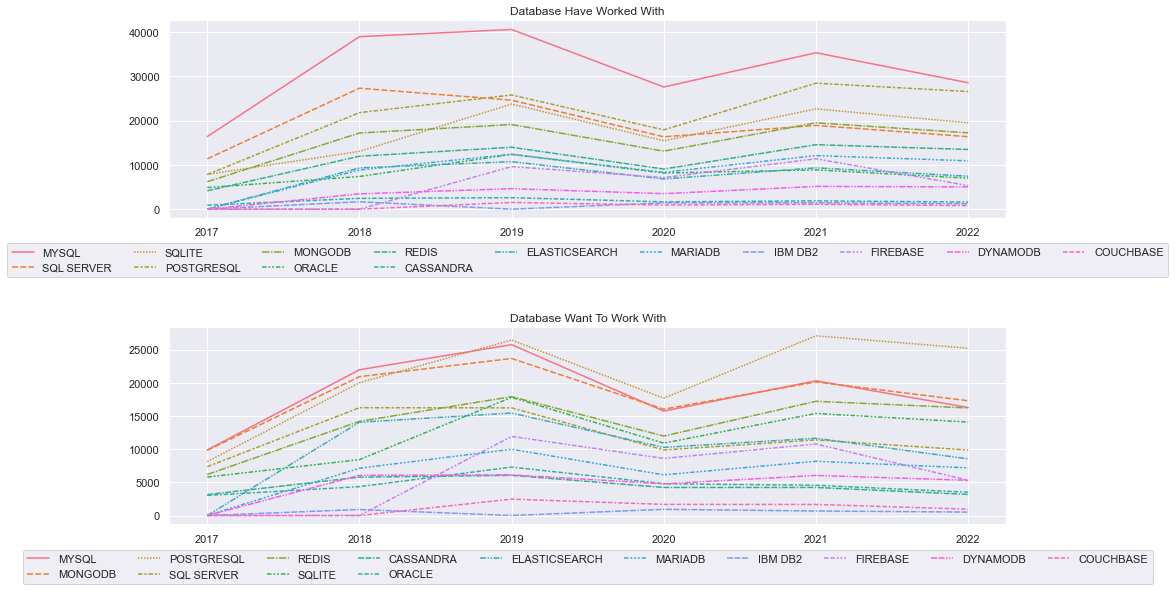

In [109]:
fig, axes = plt.subplots(2, figsize=(15,8))


sns.lineplot(data=df_database_current.T, ax=axes[0])
sns.lineplot(data=df_database_desire.T, ax=axes[1])

pos = axes[1].get_position()
pos.y0 = pos.y0 - 0.12
pos.y1 = pos.y1 - 0.12
axes[1].set_position(pos)

axes[0].legend(bbox_to_anchor=(0.5,-0.3), loc='lower center', borderaxespad=0., ncol=10)
axes[1].legend(bbox_to_anchor=(0.5,-0.3), loc='lower center', borderaxespad=0., ncol=10)

axes[0].set_title('Database Have Worked With')
axes[1].set_title('Database Want To Work With')

# 2. What is the most popular and desired Database in 2022?

In [99]:
db_current_2022 = df_2022.DatabaseHaveWorkedWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();
db_desire_2022 = df_2022.DatabaseWantToWorkWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();

db_2022 = pd.concat([db_current_2022, db_desire_2022], axis=1, join='inner')

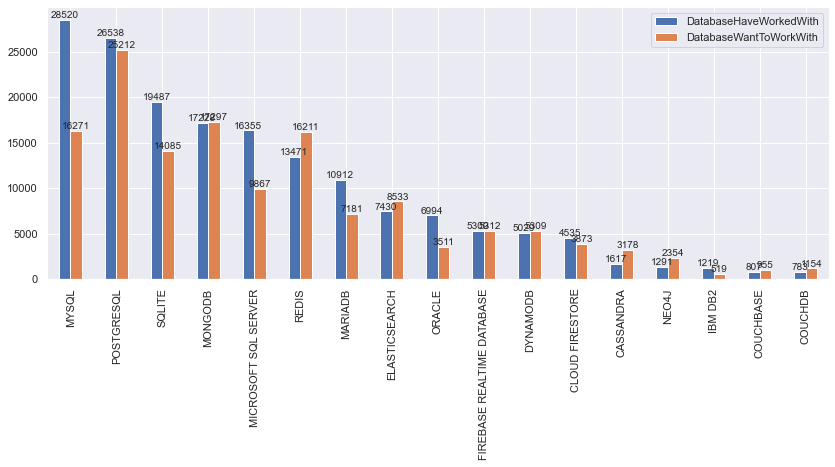

In [105]:
fig2, ax2 = plt.subplots(figsize=(14,5))

db_2022.plot.bar(ax=ax2)
ax2.set_title('Most popular and desired database in 2022')

for bars in ax2.containers:
    ax2.bar_label(bars)

# 3. What is the change of desired database 2021 and 2022?

In [130]:
db_desire_2022 = df_2022.DatabaseWantToWorkWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();
db_desire_2021 = df_2021.DatabaseWantToWorkWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();

In [131]:
df_2022.shape[0]
db_desire_2022.rename(2022, inplace=True)
db_desire_2022 = db_desire_2022.apply(lambda x: x/df_2022.shape[0])

In [132]:
df_2021.shape[0]
db_desire_2021.rename(2021, inplace=True)
db_desire_2021 = db_desire_2021.apply(lambda x: x/df_2021.shape[0])

In [133]:
db_desire_2021_22 = pd.concat([db_desire_2021, db_desire_2022], axis=1, join='inner')

In [142]:
db_desire_2021_22['Diff_2021_2022'] = db_desire_2021_22[2022] - db_desire_2021_22[2021]

In [148]:
db_desire_2021_22.style.bar(subset=['Diff_2021_2022'], align='zero', color=['#d65f5f', '#5fba7d'])

,2021,2022,Diff_2021_2022
POSTGRESQL,0.324572,0.344107,0.019534
MYSQL,0.243375,0.222075,-0.021300
MONGODB,0.241266,0.236079,-0.005188
REDIS,0.206282,0.221256,0.014974
SQLITE,0.184338,0.192239,0.007901
ELASTICSEARCH,0.139551,0.116463,-0.023088
MICROSOFT SQL SERVER,0.136555,0.134670,-0.001885
MARIADB,0.097988,0.098010,0.000022
DYNAMODB,0.072376,0.072460,0.000084
ORACLE,0.054615,0.047920,-0.006695


In [180]:
dbc = db_desire_2021_22[[2021,2022]]

In [181]:
dbc = dbc.melt(var_name="Year", value_name="per", ignore_index=False)
dbc.reset_index(inplace=True)
dbc.rename(columns = {'index':'Language'}, inplace=True)

Text(0.5, 1.005, 'Change of Desired 2021 vs 2022')

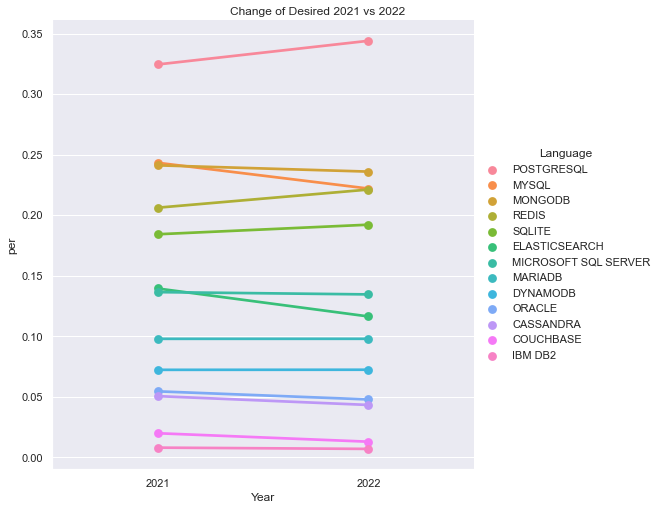

In [198]:
c = sns.catplot(data=dbc, x='Year', y='per', hue='Language', kind="point", height=7, aspect=1)
c.fig.suptitle('Change of Desired 2021 vs 2022', y=1.005)